In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

power_curve = pd.read_csv("../res/Power_curve.csv")

failures = pd.read_csv("../res/wind-farm-1-failures-training.csv", sep=";")
logs_train = pd.read_csv("../res/wind-farm-1-logs-training.csv", sep=";")
metmast_train = pd.read_csv("../res/wind-farm-1-metmast-training.csv", sep=";")
signals_train = pd.read_csv("../res/wind-farm-1-signals-training.csv", sep=";")

logs_test = pd.read_csv("../res/wind-farm-1-logs-testing.csv", sep=";")
metmast_test = pd.read_csv("../res/wind-farm-1-metmast-testing.csv", sep=";")
signals_test = pd.read_csv("../res/wind-farm-1-signals-testing.csv", sep=";")

logs = pd.concat([logs_train, logs_test])
metmast = pd.concat([metmast_train, metmast_test])
signals = pd.concat([signals_train, signals_test])

power_curve.columns = ["wind_speed", "power"]

failures.Timestamp = pd.to_datetime(failures.Timestamp)
logs.TimeDetected = pd.to_datetime(logs.TimeDetected)
logs.TimeReset = pd.to_datetime(logs.TimeReset)
metmast.Timestamp = pd.to_datetime(metmast.Timestamp)
signals.Timestamp = pd.to_datetime(signals.Timestamp)

cols = ["Turbine_ID", "Timestamp", "Grd_Prod_Pwr_Avg", "Amb_WindSpeed_Avg", "Amb_Temp_Avg", "Nac_Temp_Avg",
            "Rtr_RPM_Avg", "Gear_Bear_Temp_Avg", "Gen_RPM_Avg", "Gen_Bear2_Temp_Avg", "Gen_Bear_Temp_Avg",
            "Prod_LatestAvg_TotActPwr", "Hyd_Oil_Temp_Avg", "Gear_Oil_Temp_Avg"]

signals.drop(columns=signals.columns.difference(cols), inplace=True)

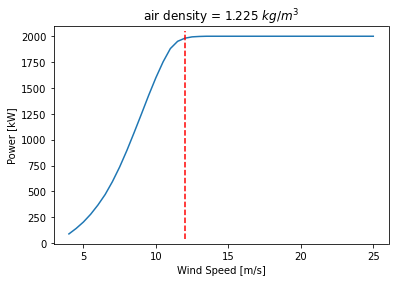

In [2]:
# power curve plot
fig, ax = plt.subplots()
ax.plot(power_curve.wind_speed, power_curve.power)
ax.set_xlabel("Wind Speed [m/s]")
ax.set_ylabel("Power [kW]")
ax.set_title("air density = $1.225 \ kg/m^{3}$")
plt.axvline(x=12, ymin=0.02, ymax=0.98, ls="--", color="red")
plt.savefig("../img/Power_curve.png")

In [3]:
# data from 2016-01-01 to 2017-12-31 (2 years)
signals

,Turbine_ID,Timestamp,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_Temp_Avg,Prod_LatestAvg_TotActPwr,Grd_Prod_Pwr_Avg,Gen_Bear2_Temp_Avg
0,T11,2016-01-01 00:00:00+00:00,1270.9,42.0,30,48,55,27,11.3,5.3,18,41059.0,246.1,38
1,T06,2016-01-01 00:00:00+00:00,1248.5,42.0,30,43,48,29,11.1,3.8,18,10465.0,62.5,35
2,T01,2016-01-01 00:00:00+00:00,1249.0,41.0,30,44,48,28,11.1,3.3,18,4313.0,26.2,37
3,T09,2016-01-01 00:00:00+00:00,1272.0,40.0,44,43,48,29,11.2,5.2,18,33173.0,198.4,33
4,T07,2016-01-01 00:00:00+00:00,1254.9,41.0,32,45,49,27,11.1,4.1,18,18831.0,112.7,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87634,T11,2017-12-31 23:50:00+00:00,1262.0,42.0,28,50,56,23,11.2,5.5,15,50107.0,300.7,37
87635,T07,2017-12-31 23:50:00+00:00,1257.6,38.0,30,49,52,21,11.1,5.3,15,43807.0,262.4,32
87636,T01,2017-12-31 23:50:00+00:00,1250.7,39.0,26,49,53,25,11.1,5.4,15,40429.0,242.6,38
87637,T09,2017-12-31 23:50:00+00:00,1249.5,39.0,45,46,50,26,11.0,5.2,15,37064.0,222.1,32


In [4]:
# firs look on numeric variables - there are negative values for power... (system error?)
signals.describe()

,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_Temp_Avg,Prod_LatestAvg_TotActPwr,Grd_Prod_Pwr_Avg,Gen_Bear2_Temp_Avg
count,521784.000000,521777.000000,521784.000000,521784.000000,521784.000000,521784.000000,521784.000000,521784.000000,521784.000000,521784.000000,521784.000000,521784.000000
mean,1063.225465,46.714901,37.577521,47.578423,51.544363,29.913087,9.338654,6.014890,19.897783,88325.767116,529.933799,43.148015
std,612.100405,17.030451,8.352862,6.968728,10.066023,5.417386,5.533355,3.582288,5.560522,110010.406435,660.055857,13.826391
min,0.000000,12.000000,20.000000,15.000000,15.000000,15.000000,0.000000,0.400000,4.000000,-5367.000000,-32.100000,13.000000
25%,271.000000,35.000000,30.000000,43.000000,44.000000,26.000000,2.400000,3.200000,16.000000,-601.000000,-3.600000,33.000000
50%,1274.700000,44.000000,36.000000,49.000000,53.000000,29.000000,11.300000,5.300000,19.000000,36247.500000,217.400000,41.000000
75%,1591.800000,56.000000,45.000000,53.000000,60.000000,34.000000,14.100000,8.200000,24.000000,147484.000000,884.900000,52.000000
max,1685.000000,205.000000,55.000000,65.000000,72.000000,51.000000,14.900000,26.600000,41.000000,371256.000000,2000.700000,205.000000


In [5]:
# data types are ok
signals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521784 entries, 0 to 87638
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   Turbine_ID                521784 non-null  object             
 1   Timestamp                 521784 non-null  datetime64[ns, UTC]
 2   Gen_RPM_Avg               521784 non-null  float64            
 3   Gen_Bear_Temp_Avg         521777 non-null  float64            
 4   Hyd_Oil_Temp_Avg          521784 non-null  int64              
 5   Gear_Oil_Temp_Avg         521784 non-null  int64              
 6   Gear_Bear_Temp_Avg        521784 non-null  int64              
 7   Nac_Temp_Avg              521784 non-null  int64              
 8   Rtr_RPM_Avg               521784 non-null  float64            
 9   Amb_WindSpeed_Avg         521784 non-null  float64            
 10  Amb_Temp_Avg              521784 non-null  int64              
 11  P

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " rows.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(signals) # later -> linear interpolation

Your selected dataframe has 14 columns and 521784 rows.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Gen_Bear_Temp_Avg,7,0.0


In [9]:
# we will need to make new frequency (10 min) for Timestamp column to merge it with signals data frame
failures.head()

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator
1,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00+00:00,Error in pitch regulation
2,T07,GENERATOR_BEARING,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...
3,T09,GENERATOR_BEARING,2016-06-07 16:59:00+00:00,High tempemperature generator bearing
4,T07,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer


In [10]:
# which component has more failures?
failures_table = failures.groupby("Component").count().reset_index()
failures_table = failures_table.iloc[:, :2]
failures_table.columns = ["Component’s Group", "Failures"]
failures_table.sort_values(by="Failures", inplace=True, ascending=False)
failures_table = failures_table.reset_index(drop=True)
failures_table

,Component’s Group,Failures
0,GENERATOR,7
1,GENERATOR_BEARING,6
2,HYDRAULIC_GROUP,5
3,TRANSFORMER,3
4,GEARBOX,2


In [11]:
failures.Timestamp = failures.Timestamp.dt.round(freq="10min")
signals = signals.merge(failures, on=["Turbine_ID", "Timestamp"], how="left")

In [12]:
# unique wind turbines in dataset
signals.Turbine_ID.unique()

array(['T11', 'T06', 'T01', 'T09', 'T07'], dtype=object)

In [13]:
# make separate data frames for each turbine
signals_T01 = signals[signals.Turbine_ID == "T01"].reset_index(drop=True)
signals_T06 = signals[signals.Turbine_ID == "T06"].reset_index(drop=True)
signals_T07 = signals[signals.Turbine_ID == "T07"].reset_index(drop=True)
signals_T09 = signals[signals.Turbine_ID == "T09"].reset_index(drop=True)
signals_T11 = signals[signals.Turbine_ID == "T11"].reset_index(drop=True)

In [14]:
def plot_wind_power(turbine):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(turbine.Amb_WindSpeed_Avg, turbine.Grd_Prod_Pwr_Avg, alpha = 0.15)
    ax.plot(power_curve.wind_speed, power_curve.power, c="red")
    turbine_failures = turbine[turbine.Component.notna()]
    sns.scatterplot(x="Amb_WindSpeed_Avg", y="Grd_Prod_Pwr_Avg", data=turbine_failures, hue="Component", ax=ax,
                    palette="husl", s=80, edgecolor="black")
    ax.legend(title="Failure Component")
    ax.set_xlabel("Wind Speed [m/s]")
    ax.set_ylabel("Generated Power [kW]")
    ax.set_title("Turbine " + str(turbine.Turbine_ID[0]))
    plt.savefig("../img/turbine_wind_power.png")

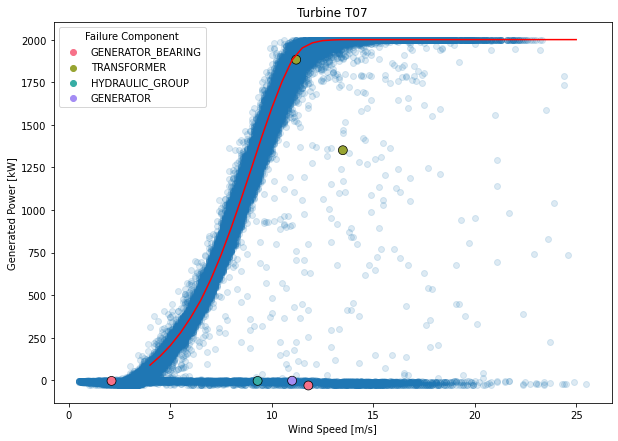

In [15]:
# select turbine
plot_wind_power(signals_T07)

In [16]:
def plot_active_power():
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(signals.Amb_WindSpeed_Avg, signals.Prod_LatestAvg_TotActPwr, alpha = 0.05)
    ax.set_xlabel("Wind Speed [m/s]")
    ax.set_ylabel("Active Power [Wh]")
    plt.axvline(4, color="red", ls="--", ymin=0.02, ymax=0.98)
    plt.axvline(12, color="red", ls="--", ymin=0.02, ymax=0.98)
    ax.set_title("Wind turbine operation regions")

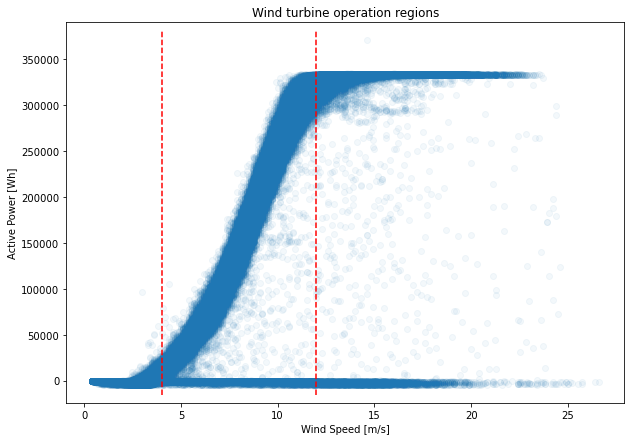

In [17]:
plot_active_power()

In [20]:
# wind speed and ambient tempearture but we have these in signals data frame too
metmast.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2016-01-01 00:00:00+00:00,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,236.0,...,0,0.0499,0.24,1,0,0,600,98,99,418
1,2016-01-01 00:10:00+00:00,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,236.0,...,0,0.0499,0.24,1,0,0,600,99,101,418
2,2016-01-01 00:20:00+00:00,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,236.0,...,0,0.0499,0.24,1,0,0,600,111,113,418
3,2016-01-01 00:30:00+00:00,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,236.0,...,0,0.0499,0.24,1,0,0,600,122,125,418
4,2016-01-01 00:40:00+00:00,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,236.0,...,0,0.0499,0.24,1,0,0,600,121,123,417


In [21]:
# correlation between variables of the EDP dataset
X = signals.loc[:, ["Gen_RPM_Avg", "Gen_Bear_Temp_Avg", "Hyd_Oil_Temp_Avg", "Gear_Oil_Temp_Avg", "Nac_Temp_Avg",
                   "Rtr_RPM_Avg", "Amb_WindSpeed_Avg", "Amb_Temp_Avg"]]

corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_Temp_Avg
Gen_RPM_Avg,1.000000,0.645519,0.204963,0.798326,0.339172,0.999370,0.736996,0.145658
Gen_Bear_Temp_Avg,0.645519,1.000000,0.467666,0.678222,0.611438,0.643898,0.748727,0.366896
Hyd_Oil_Temp_Avg,0.204963,0.467666,1.000000,0.278377,0.674393,0.201998,0.379857,0.535815
Gear_Oil_Temp_Avg,0.798326,0.678222,0.278377,1.000000,0.503863,0.795775,0.727250,0.322539
Nac_Temp_Avg,0.339172,0.611438,0.674393,0.503863,1.000000,0.337319,0.486318,0.877169
Rtr_RPM_Avg,0.999370,0.643898,0.201998,0.795775,0.337319,1.000000,0.734893,0.145053
Amb_WindSpeed_Avg,0.736996,0.748727,0.379857,0.727250,0.486318,0.734893,1.000000,0.197140
Amb_Temp_Avg,0.145658,0.366896,0.535815,0.322539,0.877169,0.145053,0.197140,1.000000


In [22]:
# add some new columns for group_by plots

def get_season(x):
    if x in [12, 1, 2]:
        return "Winter"
    elif x in [3, 4, 5]:
        return "Spring"
    elif x in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

signals["Hour"] = signals.Timestamp.dt.hour
signals["Day"] = signals.Timestamp.dt.day
signals["Month"] = signals.Timestamp.dt.month
signals["Year"] = signals.Timestamp.dt.year
signals["Season"] = signals.Month.apply(get_season)

In [23]:
signals_by_hour = signals.groupby("Hour").mean().reset_index()
signals_by_ms = signals.groupby(["Month", "Season"]).mean().reset_index()

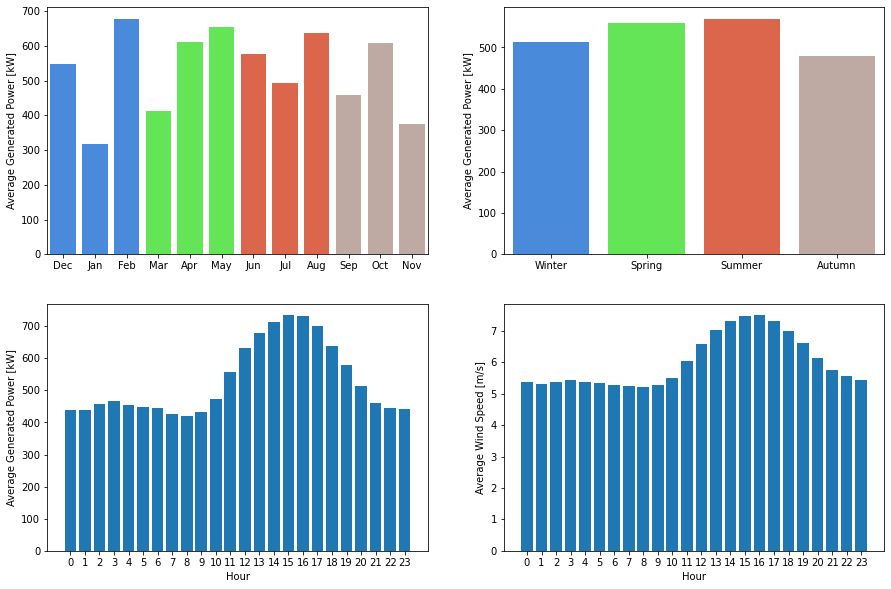

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

order = [12] + list(range(1,12))
color = ["#3187F3"]*3 + ["#51FB40"]*3 + ["#F45734"]*3 + ["#C3A69F"]*3
months_short = ["Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"]
sns.barplot(data=signals_by_ms, x="Month", y="Grd_Prod_Pwr_Avg", ax=ax1, order=order, palette=color)
ax1.set_xticklabels(months_short)
ax1.set_xlabel("")

sns.barplot(data=signals_by_ms, x="Season", y="Grd_Prod_Pwr_Avg", ax=ax2,
            palette=["#3187F3", "#51FB40", "#F45734", "#C3A69F"], ci=False)
ax2.set_xlabel("")

ax3.bar(signals_by_hour.Hour, signals_by_hour.Grd_Prod_Pwr_Avg)

ax4.bar(signals_by_hour.Hour, signals_by_hour.Amb_WindSpeed_Avg)

ax1.set_ylabel("Average Generated Power [kW]")
ax2.set_ylabel("Average Generated Power [kW]")
ax3.set_ylabel("Average Generated Power [kW]")
ax4.set_ylabel("Average Wind Speed [m/s]")

ax3.set_xlabel("Hour")
ax4.set_xlabel("Hour")

ax3.set_xticks(range(24))
ax4.set_xticks(range(24))

plt.savefig("../img/groupby_plots.png")

All basic steps with data preparation was moved to ***intro.py*** module for simplicity and to have easier access to clean data for other jupyter notebooks.